## Importing libraries

In [ ]:
mport libraries for Data Preprocessing & Data Augmentation
import os
import PIL
import numpy as np
import cv2
import tensorflow as tf#
from pathlib import Path
import matplotlib.pyplot as plt
from skimage import io
from PIL import Imaged
from keras.preprocessing.image import ImageDataGenerator

#Import libraries for Model Implementation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from keras import layers, optimizersI
from keras.layers import Input, Flatten
from keras.models import Sequential, Model
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet201
import warnings
warnings.simplefilter("ignore")

ModuleNotFoundError: No module named 'keras_tuner'

## Loading and transforming dataset

In [ ]:

mport os
import PIL
import numpy as np
import cv2
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator




In 2015, about 90.5 million people worldwide had cancer. In 2019, annual cancer cases grew by 23.6 million people, and there were 10 million deaths worldwide, representing over the previous decade increases of 26% and 21%
respectively. In 2012, about 165,000 children under 15 years of age were diagnosed with cancer. The risk of cancer increases significantly with age, and many cancers occur more commonly in developed countries. Rates arewd



#Import libraries for Model Implementation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
mostre  te moste  import classsfication _report

moste to yuseing to postring imorant _report
from to use that to posreing imporant_report
from sklearn.metrics import classification_report
from tensorflow import keras

#Import libraries for Model Implementation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
mostre  te moste  import classsfication _report

moste to yuseing to postring imorant _report0.
from to use that to posreing imporant_report
from sklearn.metrics import classification_report
from tensorflow import keras

#Load the images from given path and labeling

mostre  mostree import keras
mostre mostree import keres



def extract_data(path, label):
    data = []
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img), 0)
        if image is not None:
            data.append([image, label])
    return data


#Transform dataset using resize, rescale, reshape

def transform_data(data):
    images, labels = [],[]
    size = 128
    for img,label in data:
        images.append((cv2.resize(img,(size,size)))/255)
        labels.append(label)
    img_array = np.array(images)
    X = img_array.reshape(img_array.shape[0],img_array.shape[1],img_array.shape[2],1)
    return X, labele


Diarrhea
Weight loss
Drenching night sweats
Abnormal lumps or bumps
Observable or measurable aspects such as weight loss, a fever, or unusual bleeding
Symptoms felt internally by the individual such as fatigue or changes in appetite
Pain (headaches or bone aches)
Skin changes (new moles or bumps)
Coughing

Fatigue
Shortness of breath
Anemia
Diarrhea
Weight loss
Drenching night sweats
Abnormal lumps or bumps



Carcinoma: Begins in the skin or in tissues that line or cover internal organs
Sarcoma: Begins in bone, cartilage, fat, muscle, blood vessels, or other connective or supportive tissue
Leukemia: Begins in blood-forming tissue, such as the bone marrow
Malignant tumors can spread cancer cells throughout the body through the blood or lymphatic system, a process known as metastasis.
Symptoms




FileNotFoundError: [Errno 2] No such file or directory: 'Dataset_BUSI_with_GT/benign'

In [ ]:
X, labels = transform_data(data)   #Call the function to transform and return with image array & label
X.shape

NameError: name 'data' is not defined

In [ ]:
  X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.25, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

NameError: name 'train_test_split' is not defined

### Augmented Data

**Generator for augmenting data**

In [ ]:
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
                samplewise_center=False,
                featurewise_std_normalization=False,
                samplewise_std_normalization=False,
                zca_whitening=False,
                zca_epsilon=1e-6,
                rotation_range=0.,
                width_shift_range=0.,
                height_shift_range=0.,
                shear_range=0.,
                zoom_range=0.,
                channel_shift_range=0.,
                fill_mode='nearest',
                cval=0.,
                horizontal_flip=False,
                vertical_flip=False,
                rescale=None,
                preprocessing_function=None,
                data_format=K.image_data_format())

NameError: name 'keras' is not defined

In [ ]:

#Import libraries for Data Preprocessing & Data Augmentation
import os
import PIL
import numpy as np
import cv2
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

#Import libraries for Model Implementation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from keras import layers, optimizers
from keras.layers import Input, Flatten
from keras.models import Sequential, Model
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet201
import warnings
warnings.simplefilter("ignore")

ModuleNotFoundError: No module named 'keras_tuner'

In [ ]:
def aug_transform_data(data):              #Transform dataset using resize, rescale, reshape
    images, labels = [],[]
    size=128
    for img,label in data:
        images.append((cv2.resize(img,(size,size)))/255)
        labels.append(label)
    img_array = np.array(images)
    X = img_array.reshape(img_array.shape[0],img_array.shape[1],img_array.shape[2],1)
    return X, labels

In [ ]:
aug_data = extract_data("aug_data/benign",0)
aug_data.extend(extract_data("aug_data/malignant",1))

NameError: name 'os' is not defined

In [ ]:
x, label = aug_transform_data(aug_data)
x.shape

NameError: name 'aug_data' is not defined

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

NameError: name 'train_test_split' is not defined

**Function for classification report of any model**

In [ ]:
def report(model, aug = False):
    if aug:
        xtest = x_val
        y_true = y_val
    else:
        xtest = X_val
        y_true = Y_val
    y_pred = []
    for i in model.predict(xtest,batch_size=10,verbose=0):
        y_pred.append(np.argmax(i))
    print(classification_report(y_true, y_pred, target_names= ['benign','malignant']))  WWW

In [ ]:
#First Base Model
model1 = Sequential([
    layers.Conv2D(16, 4, padding = 'same', activation = 'relu', input_shape=(128,128,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation = 'softmax')
])

#Compile the model with optimizer and metrics
model1.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

#Review the model summary
model1.summary()

2022-09-19 13:46:21.579529: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-19 13:46:21.580039: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      272       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooli

In [ ]:
#Model performance
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(25)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.title('model LOSS')
plt.show()

NameError: name 'result' is not defined

In [ ]:
wreport(model1)        #Classification Report

2022-09-19 13:47:52.870574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      benign       0.91      0.89      0.90       227
   malignant       0.77      0.81      0.79       101

    accuracy                           0.87       328
   macro avg       0.84      0.85      0.85       328
weighted avg       0.87      0.87      0.87       328



## BASE Model with Augmentation

In [ ]:
#First base model
model2 = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape=(128,128,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation = 'softmax')
])

#Compile the model with optimizer and metrics
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

#Review the model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)      

In [ ]:
#Train the model
result = model2.fit(np.array(x_train), np.array(y_train), epochs = 50,
                    validation_data=(x_test, np.array(y_test)), verbose = 2)

Epoch 1/50


2022-09-19 13:48:19.950248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-19 13:48:24.062588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


72/72 - 5s - loss: 0.5661 - accuracy: 0.7291 - val_loss: 0.6861 - val_accuracy: 0.4301 - 5s/epoch - 68ms/step
Epoch 2/50
72/72 - 3s - loss: 0.4251 - accuracy: 0.8045 - val_loss: 0.6283 - val_accuracy: 0.7242 - 3s/epoch - 43ms/step
Epoch 3/50
72/72 - 3s - loss: 0.3467 - accuracy: 0.8543 - val_loss: 0.5859 - val_accuracy: 0.7464 - 3s/epoch - 40ms/step
Epoch 4/50
72/72 - 3s - loss: 0.2878 - accuracy: 0.8787 - val_loss: 0.5196 - val_accuracy: 0.7634 - 3s/epoch - 38ms/step
Epoch 5/50
72/72 - 3s - loss: 0.2210 - accuracy: 0.9045 - val_loss: 0.4753 - val_accuracy: 0.7412 - 3s/epoch - 38ms/step
Epoch 6/50
72/72 - 3s - loss: 0.1630 - accuracy: 0.9354 - val_loss: 0.3821 - val_accuracy: 0.8549 - 3s/epoch - 39ms/step
Epoch 7/50
72/72 - 3s - loss: 0.1392 - accuracy: 0.9468 - val_loss: 0.3213 - val_accuracy: 0.8641 - 3s/epoch - 38ms/step
Epoch 8/50
72/72 - 3s - loss: 0.0891 - accuracy: 0.9634 - val_loss: 0.2361 - val_accuracy: 0.8967 - 3s/epoch - 38ms/step
Epoch 9/50
72/72 - 3s - loss: 0.0967 - accu

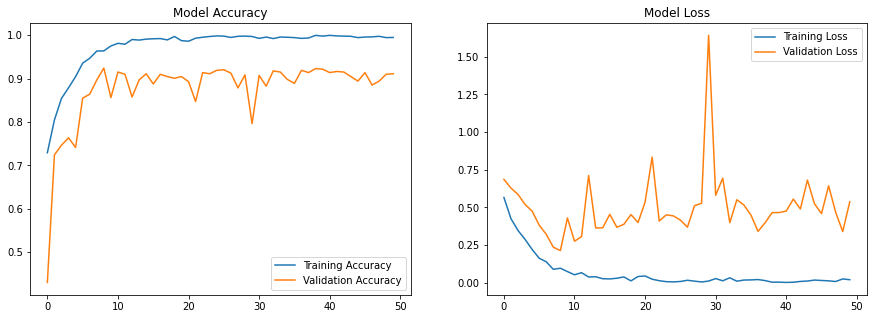

In [ ]:
#Model performance
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(50)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')e
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()

In [ ]:
report(model2, True)

2022-09-19 13:52:31.940957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      benign       0.88      0.91      0.90       328
   malignant       0.93      0.91      0.92       437

    accuracy                           0.91       765
   macro avg       0.91      0.91      0.91       765
weighted avg       0.91      0.91      0.91       765



# BASE Model with Keras Tuner

In [ ]:
def tuned_model(hp):  #Function for tuning model
  model = keras.Sequential([
    layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [4,5]),
        activation='relu',
        input_shape=(128,128,1)
    ),
    layers.MaxPooling2D(),
    layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=64, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [4,5]),
        activation='relu',
        input_shape=(128,128,1)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units = hp.Int('dense_1_units', min_value=32, max_value=128, step=16), activation='relu'),
    layers.Dense(2, activation='softmax')
  ])

  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model
  l0wwey

In [ ]:
random_search = RandomSearch(tuned_model, objective='val_accuracy',
                          max_trials = 3, directory = 'output', project_name = "exp_bcc")

In [ ]:
#Search best parameters by training model
random_search.search(np.array(X_train), np.array(Y_train), epochs = 5, validation_data=(X_test, np.array(Y_test)))

Trial 3 Complete [00h 00m 06s]
val_accuracy: 0.7987805008888245

Best val_accuracy So Far: 0.8292683362960815
Total elapsed time: 00h 00m 20s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model3 = random_search.get_best_models(num_models=1)[0]  #Find the best parameter model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 13456)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
result = model3.fit(np.array(X_train), np.array(Y_train), epochs = 25,W
            validation_data=(X_test, np.array(Y_test)), initial_epoch=5)

Epoch 6/25
 1/31 [..............................] - ETA: 9s - loss: 0.1081 - accuracy: 1.0000

2022-09-19 13:55:30.835418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 40ms/step - loss: 0.1614 - accuracy: 0.9411 - val_loss: 0.5547 - val_accuracy: 0.7805
Epoch 7/25


2022-09-19 13:55:32.019810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 1s 35ms/step - loss: 0.0924 - accuracy: 0.9726 - val_loss: 0.6470 - val_accuracy: 0.7866
Epoch 8/25
31/31 [==============================] - 1s 36ms/step - loss: 0.0600 - accuracy: 0.9848 - val_loss: 0.7931 - val_accuracy: 0.7927
Epoch 9/25
31/31 [==============================] - 1s 36ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.9353 - val_accuracy: 0.7896
Epoch 10/25
31/31 [==============================] - 1s 34ms/step - loss: 0.0248 - accuracy: 0.9939 - val_loss: 0.9112 - val_accuracy: 0.7927
Epoch 11/25
31/31 [==============================] - 1s 36ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 1.1292 - val_accuracy: 0.7988
Epoch 12/25
31/31 [==============================] - 1s 34ms/step - loss: 0.0218 - accuracy: 0.9949 - val_loss: 0.9847 - val_accuracy: 0.7835
Epoch 13/25
31/31 [==============================] - 1s 33ms/step - loss: 0.0140 - accuracy: 0.9980 - val_loss: 1.0223 - val_accuracy: 0.7835
Epoch 14/25
31/31 [=

In [ ]:
report(model3)

2022-09-19 13:55:59.148373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      benign       0.85      0.85      0.85       227
   malignant       0.66      0.67      0.67       101

    accuracy                           0.79       328
   macro avg       0.76      0.76      0.76       328
weighted avg       0.79      0.79      0.79       328



## BASE Model with Keras Tuner & Augmentation

In [ ]:
random_search = RandomSearch(tuned_model, objective='val_accuracy',
                          max_trials = 3, directory = 'output', project_name = "exp_augbcc")

In [ ]:
#Search best parameters by training model
random_search.search(np.array(x_train), np.array(y_train), epochs = 5, validation_data=(x_test, np.array(y_test)))

Trial 3 Complete [00h 00m 47s]
val_accuracy: 0.8496732115745544

Best val_accuracy So Far: 0.8549019694328308
Total elapsed time: 00h 01m 56s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model4 = random_search.get_best_models(num_models=1)[0]   #Find the best parameter model
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 64)      1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        65600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 96)                5

In [ ]:
result= model4.fit(np.array(x_train), np.array(y_train), epochs = 25,
            validation_data=(x_test, np.array(y_test)), initial_epoch=5)

Epoch 6/25
 1/72 [..............................] - ETA: 22s - loss: 0.1091 - accuracy: 1.0000

2022-09-19 14:01:48.826113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


72/72 [==============================] - ETA: 0s - loss: 0.1495 - accuracy: 0.9420

2022-09-19 14:01:57.127310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


72/72 [==============================] - 9s 129ms/step - loss: 0.1495 - accuracy: 0.9420 - val_loss: 0.3416 - val_accuracy: 0.8601
Epoch 7/25
72/72 [==============================] - 9s 129ms/step - loss: 0.0995 - accuracy: 0.9629 - val_loss: 0.3734 - val_accuracy: 0.8458
Epoch 8/25
72/72 [==============================] - 9s 129ms/step - loss: 0.0592 - accuracy: 0.9817 - val_loss: 0.4363 - val_accuracy: 0.8784
Epoch 9/25
72/72 [==============================] - 9s 126ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.4695 - val_accuracy: 0.8706
Epoch 10/25
72/72 [==============================] - 9s 126ms/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 0.4797 - val_accuracy: 0.8758
Epoch 11/25
72/72 [==============================] - 9s 124ms/step - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.5129 - val_accuracy: 0.8706
Epoch 12/25
72/72 [==============================] - 9s 125ms/step - loss: 0.0310 - accuracy: 0.9891 - val_loss: 0.4035 - val_accuracy: 0.8876
Epoch 13/25
72

In [ ]:
report(model4, True)

2022-09-19 14:08:38.600123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      benign       0.83      0.90      0.86       328
   malignant       0.92      0.86      0.89       437

    accuracy                           0.88       765
   macro avg       0.88      0.88      0.88       765
weighted avg       0.88      0.88      0.88       765



# AlexNet

In [ ]:
model5 = Sequential([
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,1)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                      

In [ ]:
model5.fit(np.array(X_train), np.array(Y_train), epochs = 25, validation_data=(X_test, np.array(Y_test)), verbose = 2,
          validation_freq=1)

Epoch 1/25


2022-09-19 14:13:36.070268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-19 14:13:42.547663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 - 7s - loss: 2.8691 - accuracy: 0.6159 - val_loss: 0.7967 - val_accuracy: 0.5030 - 7s/epoch - 232ms/step
Epoch 2/25
31/31 - 3s - loss: 0.6428 - accuracy: 0.6992 - val_loss: 0.8555 - val_accuracy: 0.4207 - 3s/epoch - 94ms/step
Epoch 3/25
31/31 - 3s - loss: 0.5458 - accuracy: 0.7388 - val_loss: 1.3696 - val_accuracy: 0.2652 - 3s/epoch - 95ms/step
Epoch 4/25
31/31 - 3s - loss: 0.5231 - accuracy: 0.7541 - val_loss: 2.3623 - val_accuracy: 0.3049 - 3s/epoch - 92ms/step
Epoch 5/25
31/31 - 3s - loss: 0.4915 - accuracy: 0.7754 - val_loss: 0.6793 - val_accuracy: 0.5976 - 3s/epoch - 93ms/step
Epoch 6/25
31/31 - 3s - loss: 0.4149 - accuracy: 0.8232 - val_loss: 0.8899 - val_accuracy: 0.3841 - 3s/epoch - 91ms/step
Epoch 7/25
31/31 - 3s - loss: 0.4207 - accuracy: 0.8486 - val_loss: 1.2874 - val_accuracy: 0.3476 - 3s/epoch - 92ms/step
Epoch 8/25
31/31 - 3s - loss: 0.4244 - accuracy: 0.8201 - val_loss: 0.9593 - val_accuracy: 0.4817 - 3s/epoch - 91ms/step
Epoch 9/25
31/31 - 3s - loss: 0.3432 - acc

In [ ]:
report(model5)

2022-09-19 14:14:51.889477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      benign       0.89      0.67      0.76       227
   malignant       0.52      0.81      0.64       101

    accuracy                           0.71       328
   macro avg       0.71      0.74      0.70       328
weighted avg       0.78      0.71      0.72       328



# ResNet50

In [ ]:
restnet = ResNet50(include_top = False, weights= None , input_shape=(128, 128, 1))
output = restnet.layers[-1].output
output = layers.Flatten()(output)

restnet = Model(restnet.input, output)

for layer in restnet.layers:
    layer.trainable = False

model6 = Sequential([
            restnet,
            layers.Dense(2, activation="softmax")
])

model6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
optimizer='adam',
metrics=['accuracy'])
model6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 32768)             23581440  
                                                                 
 dense_5 (Dense)             (None, 2)                 65538     
                                                                 
Total params: 23,646,978
Trainable params: 65,538
Non-trainable params: 23,581,440
_________________________________________________________________


In [ ]:
result = model6.fit(
    np.array(X_train),
    np.array(Y_train),
    steps_per_epoch=len(X_train),
    epochs=10,
    validation_data=(X_test, np.array(Y_test)),
    validation_steps=len(X_test),
    verbose=2
)

Epoch 1/10


2022-09-19 14:14:54.599011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-19 14:15:09.597481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


984/984 - 21s - loss: 0.9514 - accuracy: 0.6057 - val_loss: 0.6163 - val_accuracy: 0.7226 - 21s/epoch - 21ms/step
Epoch 2/10
984/984 - 17s - loss: 0.6854 - accuracy: 0.7063 - val_loss: 0.5845 - val_accuracy: 0.7409 - 17s/epoch - 17ms/step
Epoch 3/10
984/984 - 16s - loss: 0.7142 - accuracy: 0.7144 - val_loss: 0.6901 - val_accuracy: 0.7195 - 16s/epoch - 16ms/step
Epoch 4/10
984/984 - 16s - loss: 0.7009 - accuracy: 0.7398 - val_loss: 0.7449 - val_accuracy: 0.7409 - 16s/epoch - 16ms/step
Epoch 5/10
984/984 - 16s - loss: 0.6043 - accuracy: 0.7581 - val_loss: 2.2010 - val_accuracy: 0.6921 - 16s/epoch - 16ms/step
Epoch 6/10
984/984 - 16s - loss: 0.6144 - accuracy: 0.7622 - val_loss: 0.7565 - val_accuracy: 0.7561 - 16s/epoch - 16ms/step
Epoch 7/10
984/984 - 16s - loss: 0.5967 - accuracy: 0.7683 - val_loss: 0.5984 - val_accuracy: 0.7713 - 16s/epoch - 16ms/step
Epoch 8/10
984/984 - 16s - loss: 0.5831 - accuracy: 0.7744 - val_loss: 0.5186 - val_accuracy: 0.7866 - 16s/epoch - 16ms/step
Epoch 9/10


In [ ]:
report(model6)

2022-09-19 14:17:38.507308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      benign       0.78      0.95      0.86       227
   malignant       0.79      0.41      0.54       101

    accuracy                           0.78       328
   macro avg       0.79      0.68      0.70       328
weighted avg       0.78      0.78      0.76       328



# DenseNet 201

In [ ]:
model5 = Sequential([
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,1)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 30720)             18315712  
                                                                 
 dense_6 (Dense)             (None, 2)                 61442     
                                                                 
Total params: 18,377,154
Trainable params: 61,442
Non-trainable params: 18,315,712
_________________________________________________________________


In [ ]:
result = model7.fit(
    np.array(X_train),
    np.array(Y_train),
    steps_per_epoch=len(X_train),
    epochs=10,
    validation_data=(X_test, np.array(Y_test)),
    validation_steps=len(Y_test),
    verbose=2
)

Epoch 1/10


2022-09-19 14:17:47.737722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-19 14:18:24.294714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


984/984 - 54s - loss: 0.6469 - accuracy: 0.6646 - val_loss: 0.6583 - val_accuracy: 0.5945 - 54s/epoch - 55ms/step
Epoch 2/10
984/984 - 51s - loss: 0.5974 - accuracy: 0.7002 - val_loss: 0.5595 - val_accuracy: 0.7256 - 51s/epoch - 51ms/step
Epoch 3/10
984/984 - 50s - loss: 0.5672 - accuracy: 0.7266 - val_loss: 0.5562 - val_accuracy: 0.7409 - 50s/epoch - 51ms/step
Epoch 4/10
984/984 - 51s - loss: 0.5439 - accuracy: 0.7480 - val_loss: 0.5285 - val_accuracy: 0.7591 - 51s/epoch - 51ms/step
Epoch 5/10
984/984 - 51s - loss: 0.5295 - accuracy: 0.7500 - val_loss: 0.5765 - val_accuracy: 0.7439 - 51s/epoch - 52ms/step
Epoch 6/10
984/984 - 1459s - loss: 0.5157 - accuracy: 0.7724 - val_loss: 0.5133 - val_accuracy: 0.7622 - 1459s/epoch - 1s/step
Epoch 7/10
984/984 - 50s - loss: 0.5010 - accuracy: 0.7764 - val_loss: 0.5101 - val_accuracy: 0.7652 - 50s/epoch - 51ms/step
Epoch 8/10
984/984 - 50s - loss: 0.5001 - accuracy: 0.7734 - val_loss: 0.5025 - val_accuracy: 0.7683 - 50s/epoch - 51ms/step
Epoch 9/1

In [ ]:
report(model7)

2022-09-19 14:49:42.667013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      benign       0.73      0.96      0.83       227
   malignant       0.73      0.22      0.34       101

    accuracy                           0.73       328
   macro avg       0.73      0.59      0.59       328
weighted avg       0.73      0.73      0.68       328

